In [53]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from IPython.display import clear_output
import numpy as np
import time
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.family"]      = "STIXGeneral"
plt.rcParams["mathtext.rm"]      = "Bitstream Vera Sans"
plt.rcParams["mathtext.it"]      = "Bitstream Vera Sans:italic"
plt.rcParams["mathtext.bf"]      = "Bitstream Vera Sans:bold"
plt.rcParams["font.size"]        = 20
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

def read_wifi_data(file_path):
    timestamps = []
    download_speeds = []
    
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split(',')
            timestamp = datetime.strptime(parts[0], '%Y-%m-%d %H:%M:%S')
            speed = float(parts[1].split()[0])
            timestamps.append(timestamp)
            download_speeds.append(speed)
    
    return timestamps, download_speeds

############################################
wifi_data_file_1 = "wifi_data_gamma_cable.txt"
wifi_data_file_2 = "wifi_data_gamma_wifi.txt"
wifi_data_file_3 = "wifi_data_other.txt"
c1, c2, c3 = "k", "r", "b"

sleep_time = 120 # in seconds 

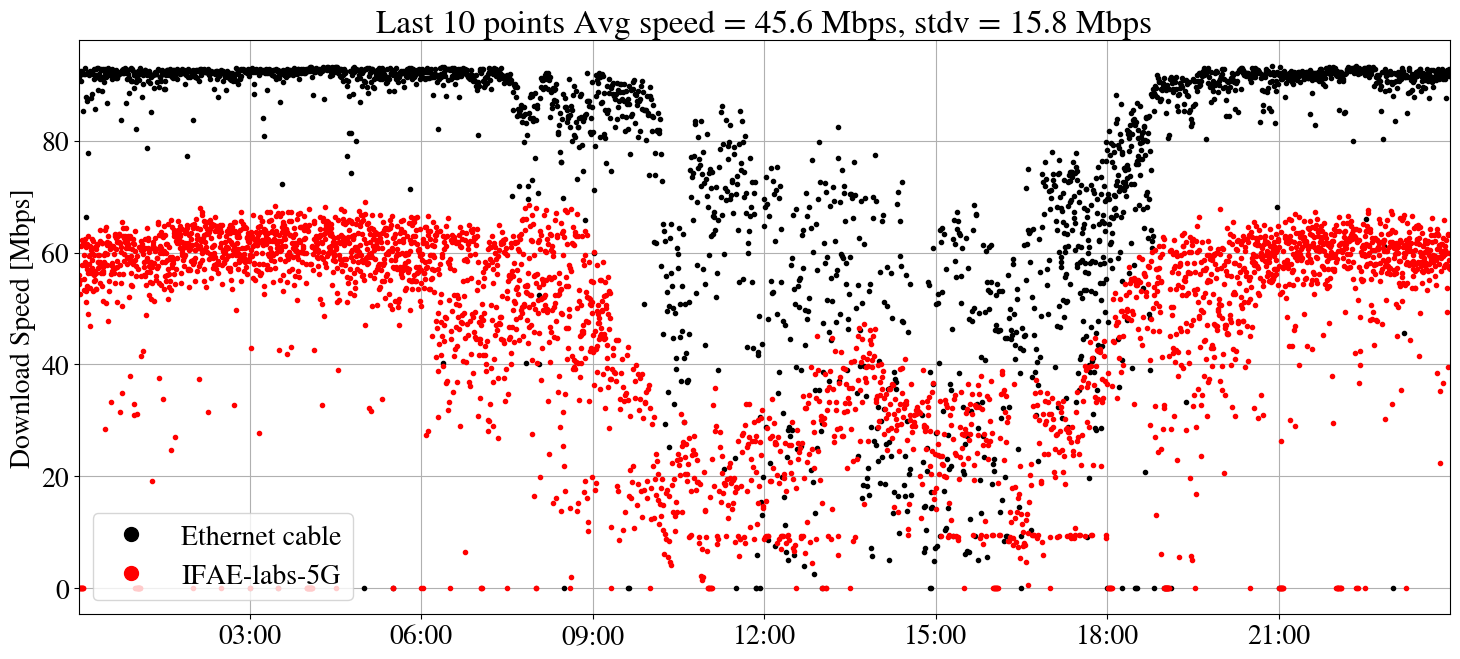

KeyboardInterrupt: 

In [55]:
while True:

    timestamps_1, download_speeds_1 = read_wifi_data(wifi_data_file_1)
    timestamps_2, download_speeds_2 = read_wifi_data(wifi_data_file_2)
    timestamps_3, download_speeds_3 = read_wifi_data(wifi_data_file_3)    
    
    
    # Folding dates
    timestamps_1 = [t.replace(year=2024, month=1, day=1) for t in timestamps_1]
    timestamps_2 = [t.replace(year=2024, month=1, day=1) for t in timestamps_2]
    timestamps_3 = [t.replace(year=2024, month=1, day=1) for t in timestamps_3]    

    clear_output(wait=True)
    
    plt.figure(figsize=(15, 7))
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))

    plt.plot(timestamps_1, download_speeds_1, marker='.', ls="", color=c1,)
    plt.plot(timestamps_2, download_speeds_2, marker='.', ls="", color=c2,)
    plt.plot(timestamps_3, download_speeds_3, marker='.', ls="", color=c3,)
    plt.plot([], [], color=c1, ls="", ms=10, marker="o", label="Ethernet cable")
    plt.plot([], [], color=c2, ls="", ms=10, marker="o", label="IFAE-labs-5G")
    plt.plot([], [], color=c3, ls="", ms=10, marker="o", label="-------")
    plt.ylabel('Download Speed [Mbps]')
    plt.title(f"Last 10 points Avg speed = {np.mean(download_speeds_3[-10:]):.1f} Mbps, stdv = {np.std(download_speeds_3[-10:]):.1f} Mbps")
    plt.tight_layout()
    plt.xlim(min(timestamps_1), max(timestamps_1))
    plt.grid()
    plt.legend(loc=3)
    plt.show()  
    
    time.sleep(sleep_time)